# Auxiliary functions

## KDE plot function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

def plot_relative_kdes(data_list, labels, bw_adjust=1, x_grid_size=1000, log_scale=False, x_min=None, x_max=None, plot_title="Relative density plots", x_title="Error", save_name="savedfile"):
    if log_scale:
        # Filter out non-positive values for log scale
        data_list = [data[data > 0] for data in data_list]
        if x_min is None:
            x_min = min(data.min() for data in data_list)
        if x_max is None:
            x_max = max(data.max() for data in data_list)
        x = np.logspace(np.log10(x_min), np.log10(x_max), x_grid_size)
    else:
        if x_min is None:
            x_min = min(data.min() for data in data_list)
        if x_max is None:
            x_max = max(data.max() for data in data_list)
        x = np.linspace(x_min, x_max, x_grid_size)

    plt.figure(figsize=(6, 6))

    # Compute and plot the KDEs
    ax = sns.kdeplot(data_list, fill=True, bw_adjust=bw_adjust, log_scale=log_scale)#, alpha=.5)
    handles = [mpatches.Patch(facecolor=color, label=label, alpha=0.5) for color, label in zip(plt.rcParams['axes.prop_cycle'].by_key()['color'], labels)]

    plt.title(plot_title)
    plt.xlabel(x_title)
    
    plt.gca().yaxis.set_visible(False)  # Remove y-axis ticks
    plt.ylabel('')  # Remove y-axis label
    '''
    if log_scale:
        plt.xscale('log')
        plt.xticks(ticks=np.logspace(np.floor(np.log10(x_min)), np.ceil(np.log10(x_max)), 
                                     num=int(np.ceil(np.log10(x_max)) - np.floor(np.log10(x_min))) + 1), 
                   labels=[f'$10^{{{int(i)}}}$' for i in np.arange(np.floor(np.log10(x_min)), np.ceil(np.log10(x_max)) + 1)])
    '''
    if log_scale:
        plt.xscale('log')
        exponent_jump = 2  # default value, you can adjust this parameter as needed
        plt.xticks(
            ticks=np.logspace(
                np.floor(np.log10(x_min)), 
                np.ceil(np.log10(x_max)), 
                num=int((np.ceil(np.log10(x_max)) - np.floor(np.log10(x_min))) / exponent_jump) + 1
            ), 
            labels=[
                f'$10^{{{int(i)}}}$' for i in np.arange(
                    np.floor(np.log10(x_min)), 
                    np.ceil(np.log10(x_max)) + 1, 
                    exponent_jump
                )
            ]
        )

    
    plt.xlim(x_min, x_max)
    plt.legend(handles=handles)
    plt.savefig(f'figures/fig_kdeplot_{save_name}.svg', bbox_inches='tight', transparent=True)
    plt.show()

## Data vs Data plotting function

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_replication_data_vs_data(data, labels, colors, xmin=1e-15, xmax=1e5, title="Error"):
    
    plt.figure(figsize=(10, 6))

    for (time_data, mse_data), label, color in zip(data, labels, colors):
        plt.scatter(mse_data, time_data, s=0.02 if label == 'Whole-genome' else 0.1, color=color, label=label)

    plt.xscale('log')
    plt.ylim(plt.ylim()[::-1])  # Invert y-axis
    plt.title('')
    plt.xlabel(title)
    plt.ylabel('Replication time (min)')
    plt.xlim((xmin, xmax))

    # Custom legend
    handles, labels = plt.gca().get_legend_handles_labels()
    new_handles = [plt.Line2D([], [], color=handle.get_facecolor()[0], marker='o', linestyle='', markersize=3) for handle in handles]
    plt.legend(handles=new_handles, labels=labels)
    
    #plt.savefig(f'figures/fig_scatter.png', bbox_inches='tight', transparent=True)
    plt.show()

def load_function(cell_line, chr_number, load_type):
    if load_type == 'time_data':
        file_path = f'data/whole-genome_timing_data/time_data_{cell_line}_chr[{chr_number}].txt'
    elif load_type == 'mse':
        file_path = f'data/whole-genome_error/error_{cell_line}_chr[{chr_number}].txt'
    elif load_type == 'fire_rates':
        file_path = f'data/whole-genome_firing_rates/fire_rates_{cell_line}_chr[{chr_number}].txt'
    return np.loadtxt(file_path, dtype=float)

# Firing rates

## Firing rate profiles

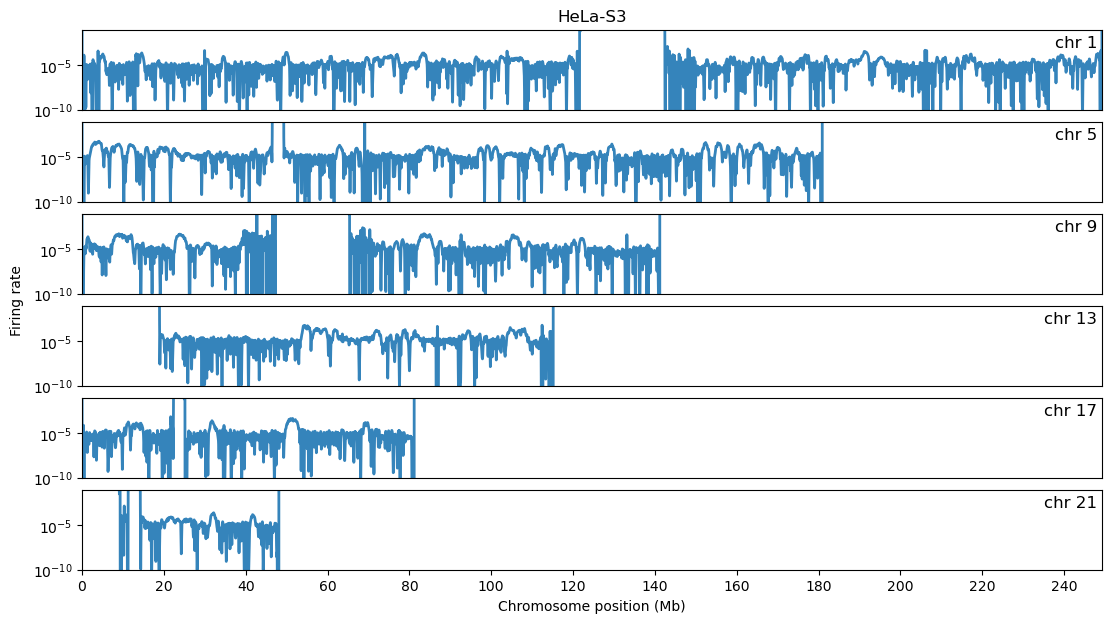

In [3]:
# Requires files in data/whole-genome_firing_rates

import matplotlib.pyplot as plt
import numpy as np

def fire_plotf(cell_line, chr_numbers, resolution, file_name, saveQ, aspect_ratio=(10, 6)):

    # Chromosome lengths in kb (1 kb resolution)
    chr_lengths = [249251, 243200, 198023, 191155, 180916, 171116, 159139, 146365, 141214, 135535, 135007, 133852, 115170, 107350, 102532, 90355, 81196, 78078, 59129, 63026, 48130, 51305]

    # Create subplots
    fig, axes = plt.subplots(len(chr_numbers), 1, figsize=aspect_ratio, sharey=True)

    for idx, chr_number in enumerate(chr_numbers):
        # Data loading: Read firing rates from a text file
        firing_rates_file_path = f'data/whole-genome_firing_rates/fire_rates_{cell_line}_chr[{chr_number}].txt'
        firing_rates = np.loadtxt(firing_rates_file_path, dtype=float)

        # Generate chromosome positions in Mb
        x = np.linspace(0, chr_lengths[chr_number - 1] / 1000, len(firing_rates))  # Chromosome positions in Mb

        # Plotting
        ax = axes[idx] if len(chr_numbers) > 1 else axes
        ax.plot(x, firing_rates, color='#1f77b4', linewidth=2, alpha=.9)
        
        if idx == 0:
            ax.set_title(f'{cell_line}')
        if idx == len(chr_numbers) - 1:
            ax.set_xlabel('Chromosome position (Mb)')
            ax.set_xticks(np.arange(0, chr_lengths[0] / 1000, 20))  # Set x-axis ticks to show every 20 Mb
        else:
            ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Remove x-axis ticks and labels for all but the last plot
        
        ax.set_yscale('log')
        ax.set_ylim(10**-10, 10**-1)
        ax.set_xlim(0, chr_lengths[0] / 1000)  # Set x-axis limit to the largest chromosome length in Mb
        ax.tick_params(axis='both', which='both', direction='out')
        for spine in ax.spines.values():
            spine.set_visible(True)
        
        # Add chromosome number on the top right corner with a transparent box
        ax.text(0.995, 0.93, f'chr {chr_number}', transform=ax.transAxes, 
                fontsize=12, verticalalignment='top', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0., edgecolor='none'))
        
        ax.grid(False)  # Remove grid for each plot

    # Add a shared y-axis label
    fig.text(0.04, 0.5, 'Firing rate', va='center', rotation='vertical')

    # Adjust layout
    plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.05, hspace=0.15)  # Adjust margins and spacing

    # Save plot if saveQ is True
    if saveQ:
        plt.savefig(f'figures/fig_plot_fire_signatures_{cell_line}.svg', bbox_inches='tight', transparent=True)

    plt.show()

# Example usage
chr_numbers=range(1,23,4)
fire_plotf(
    cell_line='HeLa-S3', 
    chr_numbers=chr_numbers,
    resolution=1000, 
    file_name='firing_rates_plot', 
    saveQ=True,
    aspect_ratio=(12, len(chr_numbers))  # Customize the aspect ratio
)

## Firing rate distribution per chromosome

In [4]:
import numpy as np
import os

def load_firing_rates(cell_line, chr_number):
    file_path = f'data/whole-genome_firing_rates/fire_rates_{cell_line}_chr[{chr_number}].txt'
    return np.loadtxt(file_path, dtype=float)

def gen_fire_rate(cell_line, chr_numbers):
    all_firing_rates = []

    for chr_number in chr_numbers:
        # Data loading: Read firing rates from a text file
        firing_rates = load_firing_rates(cell_line, chr_number)
        
        # Exclude the first and last 1000 points
        if len(firing_rates) > 2000:
            firing_rates = firing_rates[1000:-1000]
        else:
            raise ValueError("Firing rates data is too short to exclude the first and last 1000 points.")

        # Replace infinite values with NaN and exclude zero values and values outside the range [10^-10, 10^-1]
        firing_rates = firing_rates[np.isfinite(firing_rates) & (firing_rates != 0) & (firing_rates <= 10**-1) & (firing_rates >= 10**-10)]
        
        all_firing_rates.append(firing_rates)
    
    return all_firing_rates

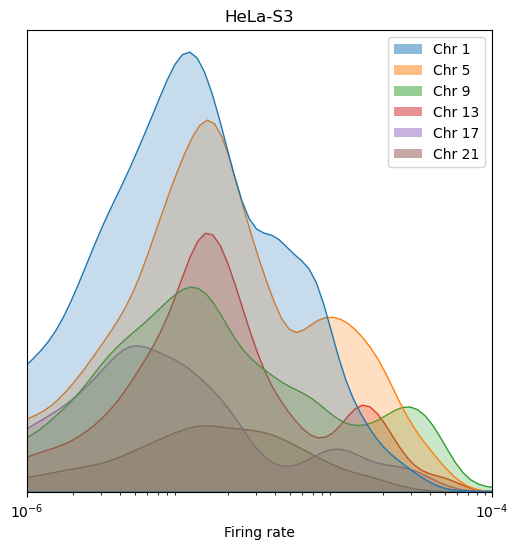

In [5]:
# Example usage
cell_line = 'HeLa-S3'
chr_numbers = range(1,23,4) #range(1,23)
firing_rates_list = gen_fire_rate(cell_line, chr_numbers)

data_list = firing_rates_list
labels = [f'Chr {i}' for i in chr_numbers]

plot_relative_kdes(data_list, labels, log_scale=True, x_min=10**-6, x_max=10**-3, plot_title=cell_line, x_title="Firing rate")

## Firing rate distribution per cell line

In [6]:
import numpy as np
import os

def load_firing_rates(cell_line, chr_number):
    file_path = f'data/whole-genome_firing_rates/fire_rates_{cell_line}_chr[{chr_number}].txt'
    return np.loadtxt(file_path, dtype=float)

def gen_fire_rate_whole(cell_lines, chr_numbers):
    all_firing_rates_per_cell_line = []

    for cell_line in cell_lines:
        all_firing_rates = []

        for chr_number in chr_numbers:
            # Data loading: Read firing rates from a text file
            firing_rates = load_firing_rates(cell_line, chr_number)
            
            # Exclude the first and last 1000 points
            if len(firing_rates) > 2000:
                firing_rates = firing_rates[1000:-1000]
            else:
                raise ValueError(f"Firing rates data for {cell_line} chr {chr_number} is too short to exclude the first and last 1000 points.")

            # Replace infinite values with NaN and exclude zero values and values outside the range [10^-10, 10^-1]
            firing_rates = firing_rates[np.isfinite(firing_rates) & (firing_rates != 0) & (firing_rates <= 10**-1) & (firing_rates >= 10**-10)]
            
            all_firing_rates.extend(firing_rates)
        
        all_firing_rates_per_cell_line.append(np.array(all_firing_rates))
    
    return all_firing_rates_per_cell_line

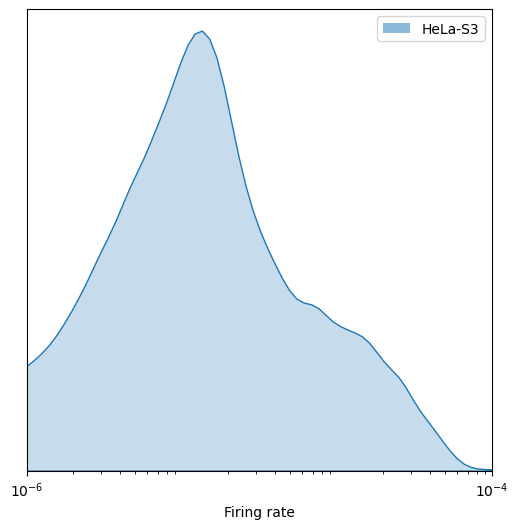

In [7]:
# Example usage
cell_lines = ["HeLa-S3"]#, "BJ1", "IMR90", "HUVEC", "K562", "GM12878", "HepG2", "MCF-7"]  # List of cell lines
chr_numbers = range(1,23)  # List of chromosome numbers to include
firing_rates_per_cell_line = gen_fire_rate_whole(cell_lines, chr_numbers)

data_list = firing_rates_per_cell_line
labels = cell_lines

plot_relative_kdes(data_list, labels, log_scale=True, x_min=10**-6, x_max=10**-3, plot_title="", x_title="Firing rate")

# Fitting errors

## Error computation

In [8]:
# Skip if data/whole-genome_error files already exist

import numpy as np
import os

def compute_squared_error(time_data, time_simulation):
    return (time_data - time_simulation) ** 2

def process_files_and_compute_squared_error(cell_lines, chr_numbers, base_path):
    for cell_line in cell_lines:
        for chr_number in chr_numbers:
            # Define file paths
            time_data_file = os.path.join(base_path, f'whole-genome_timing_data/time_data_{cell_line}_chr[{chr_number}].txt')
            time_simulation_file = os.path.join(base_path, f'whole-genome_timing_simulation/time_sim_{cell_line}_chr[{chr_number}].txt')
            error_file = os.path.join(base_path, f'whole-genome_error/error_{cell_line}_chr[{chr_number}].txt')

            # Load data
            time_data = np.loadtxt(time_data_file, dtype=float)
            time_simulation = np.loadtxt(time_simulation_file, dtype=float)

            # Compute squared error
            squared_error = compute_squared_error(time_data, time_simulation)
            
            # Save squared error to file
            np.savetxt(error_file, squared_error, fmt='%.15f')
           
# Example usage
cell_lines = ["HeLa-S3"]#,"BJ1","IMR90","HUVEC","HepG2","K562","GM12878","MCF-7"]
chr_numbers = range(1,23,1)
base_path = 'data/'
process_files_and_compute_squared_error(cell_lines, chr_numbers, base_path)


## Plotting error across chromosomes

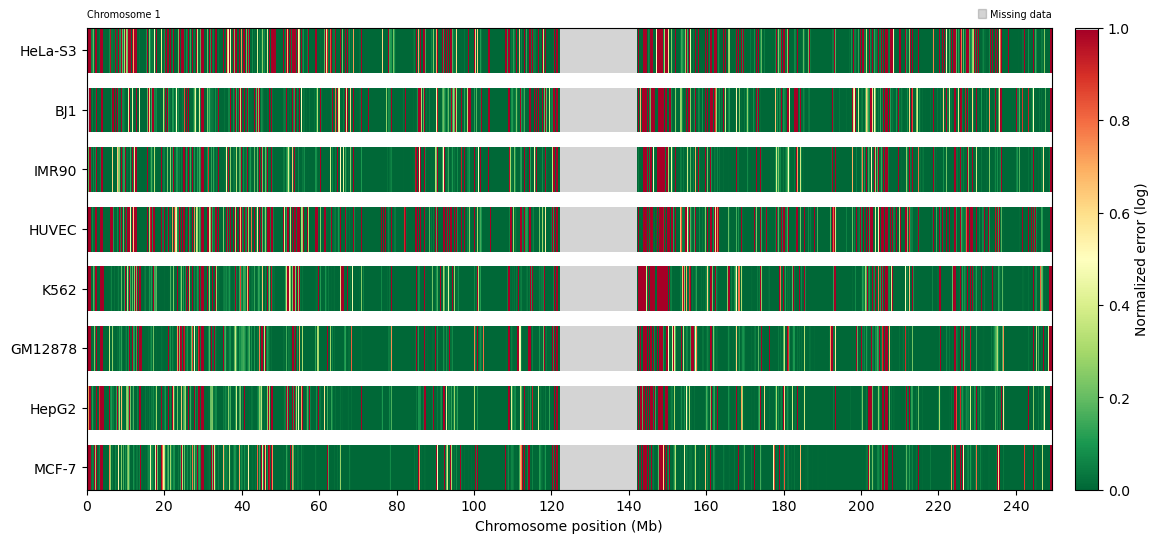

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import os

def plot_goodness_of_fit(chr_number, saveQ, cell_lines=None, base_path='data/', power_param=0.9):
    if cell_lines is None:
        cell_lines = ["HeLa-S3", "BJ1", "IMR90", "HUVEC", "K562", "GM12878", "HepG2", "MCF-7"]

    chr_lengths = [249251, 243200, 198023, 191155, 180916, 171116, 159139, 146365, 141214, 135535, 135007, 133852, 115170, 107350, 102532, 90355, 81196, 78078, 59129, 63026, 48130, 51305]
    num_positions = chr_lengths[chr_number - 1]
    num_cell_lines = len(cell_lines)

    def import_squared_error(cell_line, chr_number, base_path):
        # Define file path
        error_file = os.path.join(base_path, f'whole-genome_error/error_{cell_line}_chr[{chr_number}].txt')

        # Load data
        squared_error = np.loadtxt(error_file, dtype=float)
        return squared_error

    # Function to load missing data positions
    def load_missing_data(cell_line, chr_number, base_path='data/whole-genome_missing_data'):
        file_path = os.path.join(base_path, f'missing_data_{cell_line}_chr[{chr_number}].txt')
        if os.path.exists(file_path):
            return np.loadtxt(file_path, dtype=int)
        else:
            return np.array([], dtype=int)

    # Placeholder for goodness of fit data (use actual data from your model)
    goodness_of_fit = [import_squared_error(cell_line, chr_number, base_path) for cell_line in cell_lines]

    # Apply power transformation to skew the data
    transformed_goodness_of_fit = np.power(goodness_of_fit, power_param)

    # Create a custom colormap for vivid red to vivid green
    cmap = plt.get_cmap('RdYlGn_r')  # Note the '_r' to reverse the colormap

    # Create a colormap that includes gray for the "no data" regions
    colors = cmap(np.linspace(0, 1, 256))
    colormap_gray = np.array([[0., 0., 0., 0.17]])  # RGBA for gray in colormap
    new_colors = np.vstack((colors, colormap_gray))
    extended_cmap = ListedColormap(new_colors)

    # Normalize data for colormap
    normalized_goodness_of_fit = np.copy(transformed_goodness_of_fit)

    # Plotting with triple data plots and NaN rows between
    fig, ax = plt.subplots(figsize=(15, 6))

    # Create the spaced data array with triplicates and NaN rows
    spaced_data = np.full((num_cell_lines * 4 - 1, num_positions), np.nan)
    for i in range(num_cell_lines):
        spaced_data[i * 4] = normalized_goodness_of_fit[i]
        spaced_data[i * 4 + 1] = normalized_goodness_of_fit[i]
        spaced_data[i * 4 + 2] = normalized_goodness_of_fit[i]

    # Load missing data and update goodness_of_fit
    for i, cell_line in enumerate(cell_lines):
        missing_data = load_missing_data(cell_line, chr_number)  # Assuming chromosome 1 for simplicity
        spaced_data[i * 4, missing_data] = 256  # Mark missing data positions with index for gray
        spaced_data[i * 4 + 1, missing_data] = 256
        spaced_data[i * 4 + 2, missing_data] = 256

    # Avoiding the maximum value being exactly 1 by subtracting a small epsilon value
    spaced_data0 = spaced_data
    spaced_data = np.clip(spaced_data * 255, 0, 255 - 1)  # Normalize to 0-255 range
    spaced_data[spaced_data0 == 256] = 256  # Ensure missing data stays at 256

    # Normalize data for colormap
    cax = ax.imshow(spaced_data, aspect='auto', cmap=extended_cmap, interpolation='nearest', vmin=0, vmax=255)

    # Add color bar to the right and match height of the bars on the left
    cbar = fig.colorbar(cax, orientation='vertical', pad=0.02)
    cbar.set_label('Normalized error (log)')
    cbar.set_ticks(np.linspace(0, 255, 6))
    cbar.set_ticklabels(np.round(np.linspace(0, 1, 6), 2))

    # Set ticks and labels
    yticks_positions = np.arange(1, num_cell_lines * 4, 4)
    ax.set_yticks(yticks_positions)
    ax.set_yticklabels(cell_lines)
    xtick_positions = np.arange(0, num_positions, 20000)
    xtick_labels = (xtick_positions / 1000).astype(int)
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels)
    ax.set_xlabel('Chromosome position (Mb)')

    ax.grid(False)

    # Add a gray square and text for "Missing data" in the top right corner
    ax.text(0, 1.04, f'Chromosome {chr_number}', transform=ax.transAxes, fontsize=7, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor="none", edgecolor='none'))
    ax.text(1, 1.04, 'Missing data', transform=ax.transAxes, fontsize=7, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor="none", edgecolor='none'))
    ax.add_patch(plt.Rectangle((.924, 1.02), 0.008, 0.02, transform=ax.transAxes, color=[0., 0., 0., 0.17], clip_on=False))

    if saveQ:
        plt.savefig(f'figures/fig_goodness_of_fit_chr[{chr_number}].svg', bbox_inches='tight', transparent=True)

    plt.show()

# Example for chromosome 1
plot_goodness_of_fit(chr_number=1, saveQ=False)

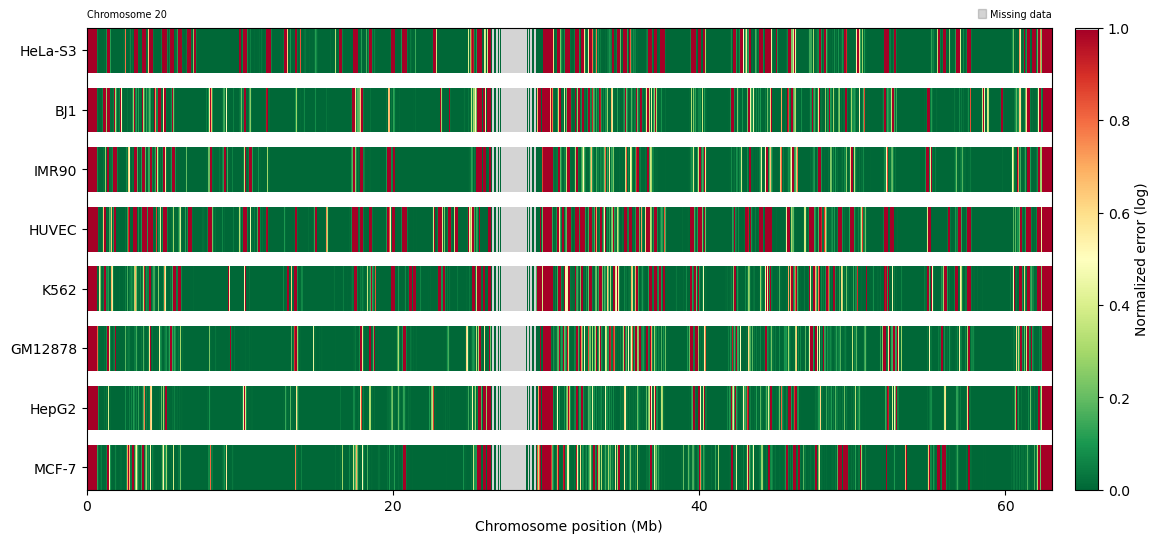

In [10]:
# Example for chromosome 20
plot_goodness_of_fit(chr_number=20, saveQ=False)

## Data vs Data scatter plots

### Region-specific generating function

#### Telomores and centromeres

In [11]:
import numpy as np

def gen_centromere_telomeres(chr_number):
    # Telomere positions (start and end 500 kb)
    telomere_start = 500  # in kb
    telomere_end_offset = 500  # in kb

    # Centromere positions (in kb, hg38, approximate)
    centromere_positions_hg38 = [
        (121535, 124535), (92326, 95326), (90505, 93505), (49660, 52660),
        (46406, 49406), (58830, 61830), (58054, 61054), (43839, 46839),
        (47368, 50368), (39255, 42255), (51644, 54644), (34857, 37857),
        (16000, 19000), (16000, 19000), (17000, 20000), (35336, 38336),
        (22263, 25263), (15461, 18461), (24682, 27682), (26370, 29370),
        (11288, 14288), (13000, 16000)
    ]

    # Provided chromosome lengths (in kb)
    chromosome_lengths = [
        249251, 243200, 198023, 191155, 180916, 171116, 159139, 146365,
        141214, 135535, 135007, 133852, 115170, 107350, 102532, 90355,
        81196, 78078, 59129, 63026, 48130, 51305
    ]

    # Define additional positions to include telomeres and centromeres
    length = chromosome_lengths[chr_number - 1]
    centromere_start, centromere_end = centromere_positions_hg38[chr_number - 1]
    telomere_positions = np.concatenate([
        np.arange(0, telomere_start),
        np.arange(length - telomere_end_offset, length)
    ])
    centromere_positions = np.arange(centromere_start, centromere_end)

    return telomere_positions, centromere_positions

#### Fragile sites

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", message=".*Creating legend with loc=\"best\" can be slow with large amounts of data.*")

def gen_fragile_site_positions(chr_number, site_letter):
    # Load the CSV file
    csv_path = 'data/fragile_sites/humCFS-fragile_sites.csv'
    df = pd.read_csv(csv_path, header=None)
    
    fragile_site_positions = []

    # Find the column corresponding to the given chromosome
    col_index = chr_number - 1  # Chromosome 1 corresponds to column 0, and so on

    if col_index >= df.shape[1]:
        raise ValueError(f"Chromosome {chr_number} not found in the CSV file.")

    # Find the row corresponding to the given site letter
    row_index = ord(site_letter.upper()) - ord('A')  # 'A' corresponds to row 0, 'B' to row 1, and so on

    if row_index >= df.shape[0]:
        raise ValueError(f"Site letter {site_letter} not found in the CSV file for chromosome {chr_number}.")

    # Extract the range in the form chrposmin-chrposmax
    site_range = df.iloc[row_index, col_index]

    if pd.isna(site_range):
        raise ValueError(f"No data for site {site_letter} on chromosome {chr_number}.")

    # Split the range into minimum and maximum positions
    pos_min, pos_max = map(int, site_range.split('-'))

    # Convert positions to kb
    pos_min_kb = pos_min // 1000
    pos_max_kb = pos_max // 1000

    # Append the range as a numpy array
    fragile_site_positions.append(np.arange(pos_min_kb, pos_max_kb))

    return fragile_site_positions[0]

#### Other auxiliary functions

In [13]:
def generate_all_data(cell_line, chr_numbers, load_type):
    all_time_data = []
    all_mse_data = []
    for chr_number in chr_numbers:
        time_data = load_function(cell_line, chr_number, "time_data")
        mse_data = load_function(cell_line, chr_number, load_type)
        all_time_data.extend(time_data)
        all_mse_data.extend(mse_data)
    return [all_time_data, all_mse_data]

def generate_telomeres_centromeres_data(cell_line, chr_numbers_tc, load_type):
    all_time_data_t = []
    all_mse_data_t = []
    all_time_data_c = []
    all_mse_data_c = []
    for chr_number in chr_numbers_tc:
        telomere_positions, centromere_positions = gen_centromere_telomeres(chr_number)
        time_data_t = load_function(cell_line, chr_number, "time_data")[telomere_positions]
        mse_data_t = load_function(cell_line, chr_number, load_type)[telomere_positions]
        all_time_data_t.extend(time_data_t)
        all_mse_data_t.extend(mse_data_t)
        time_data_c = load_function(cell_line, chr_number, "time_data")[centromere_positions]
        mse_data_c = load_function(cell_line, chr_number, load_type)[centromere_positions]
        all_time_data_c.extend(time_data_c)
        all_mse_data_c.extend(mse_data_c)
    return [all_time_data_t, all_mse_data_t], [all_time_data_c, all_mse_data_c]

def generate_fragile_sites_data(cell_line, chr_numbers_cfs, site_letters, load_type, allcfsQ=True):
    all_time_data_cfs = []
    all_mse_data_cfs = []
    all_data_cfs = []

    for chr_number in chr_numbers_cfs:
        for site_letter in site_letters:
            fragile_site_positions = gen_fragile_site_positions(chr_number, site_letter)
            time_data_cfs = load_function(cell_line, chr_number, "time_data")[fragile_site_positions]
            mse_data_cfs = load_function(cell_line, chr_number, load_type)[fragile_site_positions]

            if allcfsQ:
                all_time_data_cfs.extend(time_data_cfs)
                all_mse_data_cfs.extend(mse_data_cfs)
            else:
                all_data_cfs.extend([[time_data_cfs, mse_data_cfs]])

    if allcfsQ:
        all_data_cfs = [[all_time_data_cfs, all_mse_data_cfs]]

    return all_data_cfs

def generate_plot(load_type, cell_line, chr_numbers, chr_numbers_tc, chr_numbers_cfs, site_letters,
                  show_whole_genome=True, show_telomeres=False, show_centromeres=False, 
                  show_fragile_sites=True, allcfsQ=False, xmin=1e-15, xmax=1e-3):
    
    title = "Error" if load_type == "mse" else "Firing rate"

    all_data = []
    labels = []
    colours = []

    if show_whole_genome:
        all_data.append(generate_all_data(cell_line, chr_numbers, load_type))
        labels.append("Whole-genome")
        colours.append('#1f77b4')

    if show_telomeres:
        data_t, data_c = generate_telomeres_centromeres_data(cell_line, chr_numbers_tc, load_type)
        all_data.append(data_t)
        labels.append("Telomeres")
        colours.append('orange')

    if show_centromeres:
        data_t, data_c = generate_telomeres_centromeres_data(cell_line, chr_numbers_tc, load_type)
        all_data.append(data_c)
        labels.append("Centromeres")
        colours.append('green')

    if show_fragile_sites:
        all_data_cfs = generate_fragile_sites_data(cell_line, chr_numbers_cfs, site_letters, load_type, allcfsQ)
        all_data.extend(all_data_cfs)
        labels.extend(["Fragile sites"] if allcfsQ else [f"FRA{chr_number}{site_letter}" for chr_number in chr_numbers_cfs for site_letter in site_letters])
        colours.extend(list(plt.cm.autumn(np.linspace(0, .5, len(labels) - len(colours)))))

    plot_replication_data_vs_data(all_data, labels, colours, xmin, xmax, title=title)

### Scatter plots

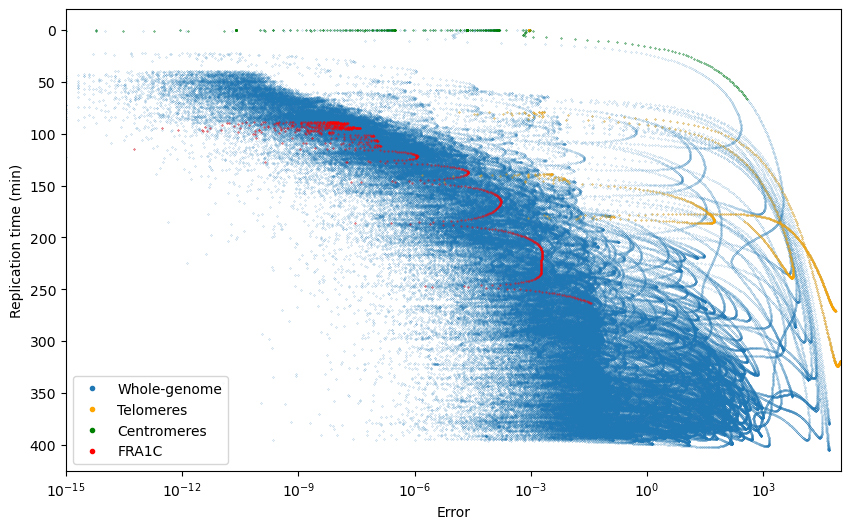

In [18]:
# Example usage
generate_plot(
    load_type="mse",
    cell_line="HeLa-S3",
    chr_numbers=[1],#range(1,23),
    chr_numbers_tc=[1],
    chr_numbers_cfs=[1],
    site_letters=['C'],
    show_whole_genome=True,
    show_telomeres=True,
    show_centromeres=True,
    show_fragile_sites=True,
    allcfsQ=False,
    xmin=1e-15,
    xmax=1e5
)

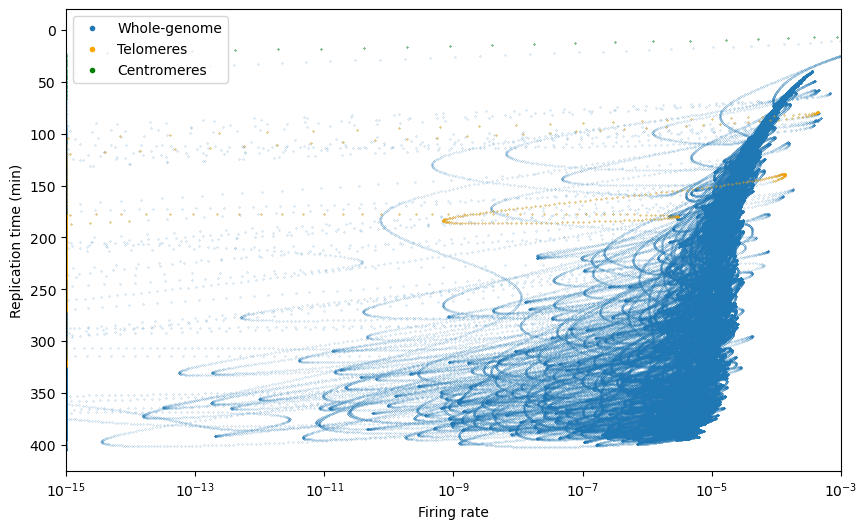

In [19]:
# Example usage
generate_plot(
    load_type="fire_rates",
    cell_line="HeLa-S3",
    chr_numbers=[1], #range(1,23),
    chr_numbers_tc=[1],#range(1,23),
    chr_numbers_cfs=[1],
    site_letters=['C'],
    show_whole_genome=True,
    show_telomeres=True,
    show_centromeres=True,
    show_fragile_sites=False,
    allcfsQ=False,
    xmin=1e-15,
    xmax=1e-3
)

## Error distributions (KDE)

### Early vs late replication

In [20]:
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

def load_time_data(cell_line, chr_number):
    file_path = f'data/whole-genome_timing_data/time_data_{cell_line}_chr[{chr_number}].txt'
    return np.loadtxt(file_path, dtype=float)

def load_error_data(cell_line, chr_number):
    file_path = f'data/whole-genome_error/error_{cell_line}_chr[{chr_number}].txt'
    return np.loadtxt(file_path, dtype=float)

def load_missing_data(cell_line, chr_number):
    file_path = f'data/whole-genome_missing_data/missing_data_{cell_line}_chr[{chr_number}].txt'
    if os.path.exists(file_path):
        return np.loadtxt(file_path, dtype=int)
    else:
        return np.array([], dtype=int)

def gen_error_late_early(cell_lines, chr_numbers, tmin, t1, t2, tmax):
    all_early_errors = []
    all_late_errors = []

    for cell_line in cell_lines:
        for chr_number in chr_numbers:
            time_data = load_time_data(cell_line, chr_number)
            error_data = load_error_data(cell_line, chr_number)
            missing_data = load_missing_data(cell_line, chr_number)

            # Remove missing data points
            if len(missing_data) > 0:
                time_data = np.delete(time_data, missing_data)
                error_data = np.delete(error_data, missing_data)

            # Split the data into early and late replication based on the time intervals
            early_errors = error_data[(time_data >= tmin) & (time_data <= t1)]
            late_errors = error_data[(time_data >= t2) & (time_data <= tmax)]

            # Add to the overall lists
            all_early_errors.extend(early_errors)
            all_late_errors.extend(late_errors)

    # Ensure no zero values before log transformation
    all_early_errors = np.array(all_early_errors)
    all_late_errors = np.array(all_late_errors)
    all_early_errors = all_early_errors[all_early_errors > 0]
    all_late_errors = all_late_errors[all_late_errors > 0]

    return all_early_errors, all_late_errors

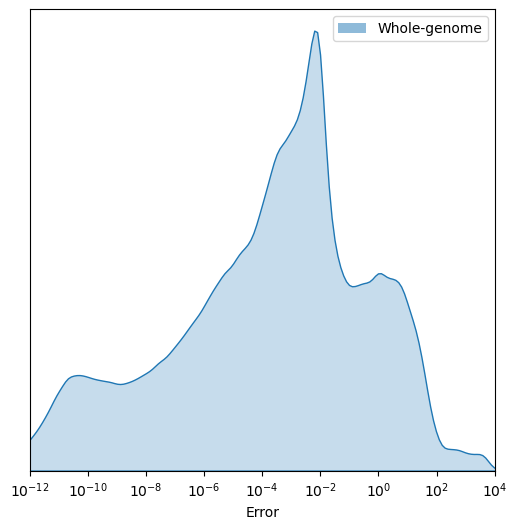

In [21]:
# Example usage
cell_lines = ["HeLa-S3"]#,"BJ1"]#,"IMR90","HUVEC","K562","GM12878","HepG2","MCF-7"]
chr_numbers = range(1,23)
tmin = 0
t1 = 500
t2 = 300
tmax = 500

early_errors, late_errors = gen_error_late_early(cell_lines, chr_numbers, tmin, t1, t2, tmax)

data_list = [early_errors]#, late_errors]
labels = ['Whole-genome']#, 'Late']

plot_relative_kdes(data_list, labels, log_scale=True, x_min=10**-12, x_max=10**5, plot_title="", bw_adjust=.8)

### AT vs GC regions

In [24]:
# Generate AT/GC region files
# Skip if data/reference_genome files already exist
# Requires pip install Bio
import gzip
from Bio import SeqIO
import os

def save_genome_locations_by_base(local_genome_file, chr_lengths):
    bases = ['A', 'T', 'G', 'C']
    
    output_dir = 'data/reference_genome'
    os.makedirs(output_dir, exist_ok=True)
    
    with gzip.open(local_genome_file, "rt") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            chr_number = record.id.lstrip("chr")  # Removing 'chr' prefix
            if chr_number.isdigit():
                chr_number = int(chr_number)
                if chr_number in range(1, 23):  # Assuming we only want chromosomes 1-22
                    seq = str(record.seq).upper()  # Ensure sequence is uppercase
                    base_files = {base: [] for base in bases}
                    
                    for kb in range(chr_lengths[chr_number-1]):
                        position = kb * 1000  # 0-based position
                        if position < len(seq):
                            base_pair = seq[position]
                            if base_pair in base_files:
                                base_files[base_pair].append(kb)
                    
                    for base, locations in base_files.items():
                        with open(os.path.join(output_dir, f'{base}_genome_locations_chr[{chr_number}].txt'), 'w') as file:
                            for loc in locations:
                                file.write(f'{loc}\n')

# Example usage
local_genome_file = 'data/reference_genome/hg38.fa.gz'  # Replace with the actual path to your hg38.fa.gz
chr_lengths = [249251, 243200, 198023, 191155, 180916, 171116, 159139, 146365, 141214, 135535, 135007, 133852, 115170, 107350, 102532, 90355, 81196, 78078, 59129, 63026, 48130, 51305]

save_genome_locations_by_base(local_genome_file, chr_lengths)


In [25]:
import numpy as np
import os

def load_error_data(cell_line, chr_number):
    file_path = f'data/whole-genome_error/error_{cell_line}_chr[{chr_number}].txt'
    return np.loadtxt(file_path, dtype=float)

def load_missing_data(cell_line, chr_number):
    file_path = f'data/whole-genome_missing_data/missing_data_{cell_line}_chr[{chr_number}].txt'
    if os.path.exists(file_path):
        return np.loadtxt(file_path, dtype=int)
    else:
        return np.array([], dtype=int)

def load_genome_location(base, chr_number):
    file_path = f'data/reference_genome/{base}_genome_locations_chr[{chr_number}].txt'
    if os.path.exists(file_path):
        return np.loadtxt(file_path, dtype=int)
    else:
        return np.array([], dtype=int)

def gen_error_AT_GC(cell_lines, chr_numbers):
    all_errors_AT = []
    all_errors_GC = []

    for cell_line in cell_lines:
        for chr_number in chr_numbers:
            error_data = load_error_data(cell_line, chr_number)
            missing_data = load_missing_data(cell_line, chr_number)

            # Remove missing data points
            if len(missing_data) > 0:
                error_data = np.delete(error_data, missing_data)

            # Load genome locations for each base
            locations_A = load_genome_location('A', chr_number)
            locations_T = load_genome_location('T', chr_number)
            locations_G = load_genome_location('G', chr_number)
            locations_C = load_genome_location('C', chr_number)

            # Initialize lists for partitioned errors
            errors_A = error_data[locations_A[locations_A < len(error_data)]]
            errors_T = error_data[locations_T[locations_T < len(error_data)]]
            errors_G = error_data[locations_G[locations_G < len(error_data)]]
            errors_C = error_data[locations_C[locations_C < len(error_data)]]

            all_errors_AT.extend(errors_A)
            all_errors_AT.extend(errors_T)
            all_errors_GC.extend(errors_G)
            all_errors_GC.extend(errors_C)

    # Ensure no zero values before log transformation
    all_errors_AT = np.array(all_errors_AT)
    all_errors_GC = np.array(all_errors_GC)
    all_errors_AT = all_errors_AT[all_errors_AT > 0]
    all_errors_GC = all_errors_GC[all_errors_GC > 0]

    return all_errors_AT, all_errors_GC

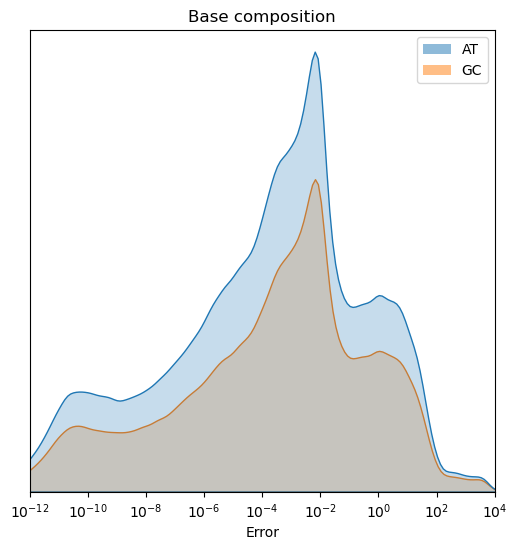

In [26]:
# Example usage
cell_lines = ["HeLa-S3"]#,"BJ1","IMR90","HUVEC","K562","GM12878","HepG2","MCF-7"]
chr_numbers = range(1,23)
errors_AT, errors_GC = gen_error_AT_GC(cell_lines, chr_numbers)

data_list = [errors_AT, errors_GC]
labels = ['AT', 'GC']

plot_relative_kdes(data_list, labels, log_scale=True, x_min=10**-12, x_max=10**5, plot_title="Base composition", bw_adjust=.8)

### Common fragile sites

In [96]:
# CFSs file creation
# Skip if data/fragile_sites files already exist
import pandas as pd
import numpy as np
import os

# Define the input file path and output directory
input_file = 'data/fragile_sites/humCFS-fragile_sites.csv'
output_dir = 'data/fragile_sites'
os.makedirs(output_dir, exist_ok=True)

# Read the CSV file
df = pd.read_csv(input_file)

# Process each column (chromosome)
for col in df.columns:
    if col.startswith('chr'):
        chr_number = col[3:]
        positions = []

        # Process each interval in the column
        for interval in df[col].dropna():
            start, end = interval.split('-')
            start_kb = int(round(int(start) / 1000))
            end_kb = int(round(int(end) / 1000))
            positions.extend(range(start_kb, end_kb + 1))

        # Export positions to a text file
        output_file = os.path.join(output_dir, f'fragile_site_position_chr[{chr_number}].txt')
        np.savetxt(output_file, np.array(positions, dtype=int), fmt='%d')

In [28]:
import numpy as np
import os

def load_error_data(cell_line, chr_number):
    file_path = f'data/whole-genome_error/error_{cell_line}_chr[{chr_number}].txt'
    return np.loadtxt(file_path, dtype=float)

def load_missing_data(cell_line, chr_number):
    file_path = f'data/whole-genome_missing_data/missing_data_{cell_line}_chr[{chr_number}].txt'
    if os.path.exists(file_path):
        return np.loadtxt(file_path, dtype=int)
    else:
        return np.array([], dtype=int)

def gen_fragile_site_positions(chr_numbers, site_letters):
    # Load the CSV file
    csv_path = 'data/fragile_sites/humCFS-fragile_sites.csv'
    df = pd.read_csv(csv_path, header=None)
    
    fragile_site_positions = []

    for chromosome in chr_numbers:
        for site_letter in site_letters:
            # Find the column corresponding to the given chromosome
            col_index = chromosome - 1  # Chromosome 1 corresponds to column 0, and so on

            if col_index >= df.shape[1]:
                raise ValueError(f"Chromosome {chromosome} not found in the CSV file.")

            # Find the row corresponding to the given site letter
            row_index = ord(site_letter.upper()) - ord('A')  # 'A' corresponds to row 0, 'B' to row 1, and so on

            if row_index >= df.shape[0]:
                raise ValueError(f"Site letter {site_letter} not found in the CSV file for chromosome {chromosome}.")

            # Extract the range in the form chrposmin-chrposmax
            site_range = df.iloc[row_index, col_index]

            if pd.isna(site_range):
                # Return an empty list if there is no data
                fragile_site_positions.append(np.array([]))
                continue

            # Split the range into minimum and maximum positions
            pos_min, pos_max = map(int, site_range.split('-'))

            # Convert positions to kb
            pos_min_kb = pos_min // 1000
            pos_max_kb = pos_max // 1000

            # Append the range as a numpy array
            fragile_site_positions.append(np.arange(pos_min_kb, pos_max_kb))

    return fragile_site_positions

def gen_error_CFGs(cell_lines, chr_numbers, site_letters):
    all_fragile_site_errors = []
    all_whole_genome_errors = []
    all_non_cfs_errors = []
    genome_size = 0

    fragile_site_positions = gen_fragile_site_positions(chr_numbers, site_letters)

    for cell_line in cell_lines:
        for chr_index, chr_number in enumerate(chr_numbers):
            # Load error data and fragile site positions
            error_data = load_error_data(cell_line, chr_number)
            fragile_positions_chr = fragile_site_positions[chr_index]
            missing_data = load_missing_data(cell_line, chr_number)

            # Remove missing data points
            if len(missing_data) > 0:
                error_data = np.delete(error_data, missing_data)

            # Get errors for fragile site positions
            fragile_site_errors = error_data[fragile_positions_chr[fragile_positions_chr < len(error_data)]]
            all_fragile_site_errors.extend(fragile_site_errors)
            all_whole_genome_errors.extend(error_data)

            # Get errors for non-fragile site positions
            non_cfs_positions = np.setdiff1d(np.arange(len(error_data)), fragile_positions_chr)
            non_cfs_errors = error_data[non_cfs_positions]
            all_non_cfs_errors.extend(non_cfs_errors)

            # Update genome size
            genome_size += len(error_data)

    # Ensure no zero values before log transformation
    all_fragile_site_errors = np.array(all_fragile_site_errors)
    all_whole_genome_errors = np.array(all_whole_genome_errors)
    all_non_cfs_errors = np.array(all_non_cfs_errors)
    all_fragile_site_errors = all_fragile_site_errors[all_fragile_site_errors > 0]
    all_whole_genome_errors = all_whole_genome_errors[all_whole_genome_errors > 0]
    all_non_cfs_errors = all_non_cfs_errors[all_non_cfs_errors > 0]

    return all_whole_genome_errors, all_fragile_site_errors, all_non_cfs_errors

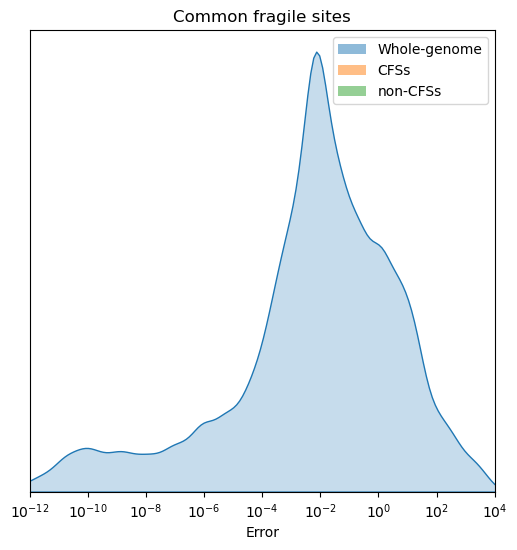

In [29]:
# Example usage
cell_lines = ['HeLa-S3']
chr_numbers = range(1,2)
site_letters = ['A', 'B']
whole_genome_errors, fragile_site_errors, non_cfs_errors = gen_error_CFGs(cell_lines, chr_numbers, site_letters)

data_list = [whole_genome_errors, fragile_site_errors, non_cfs_errors]
data_list = [fragile_site_errors]
labels = ['Whole-genome', 'CFSs', 'non-CFSs']

plot_relative_kdes(data_list, labels, log_scale=True, x_min=10**-12, x_max=10**5, plot_title="Common fragile sites", bw_adjust=.8)